# Libraries

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Model selection
from sklearn.model_selection import train_test_split, cross_val_score

# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    roc_auc_score, classification_report, confusion_matrix
)

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier,
    GradientBoostingClassifier, AdaBoostClassifier
)
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# XGBoost & LightGBM
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [41]:
#  Plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Data

## Loading

In [42]:
# Data Loading

df = pd.read_csv('features_file_hsls09.csv')

display(df.head())
display(df.info())
display(df.describe())



,STU_ID,P1TYPEPS,P1HIDEG2,S2TYPEPS2013,S3REPUTATION,X1PAR2EDU,X3TCREDAPIB,X1MOMEDU,X2PAR2EDU,X3TCREDAPMTH,...,S1PSAT,X1TXMPROF5,S2DEGREE2013,X1TXMPROF3,S2IMPACTIVITY,S2SUREBA,M1INVOLVEMNT,X3TCREDHON,X1TXMQUINT,undermatched
0,10002,3,2,3,1,2,0.0,3,2,0.0,...,1,0.0512,3,0.1768,2,2,2,0.0,2,1
1,10004,3,-7,-8,-8,-7,6.5,0,4,0.0,...,1,0.0531,-8,0.2459,-8,-8,-9,10.5,3,0
2,10010,4,2,3,-7,2,3.0,3,3,0.0,...,1,0.1865,4,0.9806,3,1,2,0.0,5,0
3,10012,3,7,3,1,7,2.0,7,7,1.0,...,1,0.3473,3,0.9961,1,1,1,0.0,5,0
4,10015,3,4,3,1,4,4.0,4,5,1.0,...,1,0.0622,3,0.5260,2,2,1,16.0,4,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2045 entries, 0 to 2044
Data columns (total 84 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   STU_ID            2045 non-null   int64  
 1   P1TYPEPS          2045 non-null   int64  
 2   P1HIDEG2          2045 non-null   int64  
 3   S2TYPEPS2013      2045 non-null   int64  
 4   S3REPUTATION      2045 non-null   int64  
 5   X1PAR2EDU         2045 non-null   int64  
 6   X3TCREDAPIB       2045 non-null   float64
 7   X1MOMEDU          2045 non-null   int64  
 8   X2PAR2EDU         2045 non-null   int64  
 9   X3TCREDAPMTH      2045 non-null   float64
 10  X1DADEDU          2045 non-null   int64  
 11  P1HIDEG1          2045 non-null   int64  
 12  X3TAGPAWGT        2045 non-null   float64
 13  X1PAR1EDU         2045 non-null   int64  
 14  S2FR4Y            2045 non-null   int64  
 15  X1SESQ5           2045 non-null   int64  
 16  X1SESQ5_U         2045 non-null   int64  


None

,STU_ID,P1TYPEPS,P1HIDEG2,S2TYPEPS2013,S3REPUTATION,X1PAR2EDU,X3TCREDAPIB,X1MOMEDU,X2PAR2EDU,X3TCREDAPMTH,...,S1PSAT,X1TXMPROF5,S2DEGREE2013,X1TXMPROF3,S2IMPACTIVITY,S2SUREBA,M1INVOLVEMNT,X3TCREDHON,X1TXMQUINT,undermatched
count,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,...,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000
mean,22412.851345,0.952078,0.970171,2.194621,-0.160391,1.096333,3.733741,1.802934,2.390709,0.703667,...,0.524694,-0.298324,2.295844,0.235318,1.093399,0.711980,-1.150611,4.851589,3.659658,0.174083
std,7214.474504,4.321775,5.196490,2.804154,3.197004,5.104103,3.445002,4.414417,4.604772,0.807536,...,2.809684,2.077530,2.902527,2.220893,2.162793,2.191801,4.926744,4.952722,3.223349,0.379274
min,10002.000000,-9.000000,-9.000000,-9.000000,-9.000000,-8.000000,0.000000,-8.000000,-8.000000,0.000000,...,-9.000000,-8.000000,-9.000000,-8.000000,-9.000000,-9.000000,-9.000000,0.000000,-8.000000,0.000000
25%,16227.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000,...,1.000000,0.066400,3.000000,0.616300,1.000000,1.000000,-8.000000,0.000000,4.000000,0.000000
50%,22285.000000,3.000000,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,4.000000,1.000000,...,1.000000,0.135600,3.000000,0.955000,2.000000,1.000000,1.000000,4.000000,5.000000,0.000000
75%,28558.000000,3.000000,4.000000,3.000000,1.000000,4.000000,6.000000,4.000000,5.000000,1.000000,...,1.000000,0.323100,3.000000,0.995300,2.000000,1.000000,3.000000,8.000000,5.000000,0.000000
max,35200.000000,4.000000,7.000000,4.000000,4.000000,7.000000,13.000000,7.000000,7.000000,3.000000,...,3.000000,0.979600,4.000000,1.000000,3.000000,4.000000,4.000000,19.000000,5.000000,1.000000


## Preprocessing

In [43]:
# Data Preprocessing

# drop stu_id
df.drop(columns=['STU_ID'], inplace=True)

## Target Variable

In [44]:
# Target variable - 'undermatched'

target_column = 'undermatched'
y = df[target_column]

X = df.drop(columns=[target_column])

# show the distribution of the target variable in terms of percentage
y_distribution = y.value_counts(normalize=True) * 100
print("Target Variable Distribution:")
print(y_distribution)

Target Variable Distribution:
0    82.591687
1    17.408313
Name: undermatched, dtype: float64


## Feature Analysis

### Feature Importance

In [45]:
# Top Features - Decision-Tree based analysis

feature_selector = ExtraTreesClassifier(random_state=42)
feature_selector.fit(X, y)
importances = feature_selector.feature_importances_

# Feature Importance DataFrame
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})

# Sort by importance 
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
display(feature_importance_df.head(10))  # Show top 10 features

,feature,importance
51,A2HIGHERED,0.018947
23,X3THILANG,0.016915
19,X3TCREDGEN,0.016821
18,X3THIMATH,0.016474
3,S3REPUTATION,0.016472
27,S2FR2YPUB,0.015860
5,X3TCREDAPIB,0.015820
46,S3FOCUS,0.015628
80,X3TCREDHON,0.015596
59,X1PAR2OCC2,0.015507


In [46]:
# Limiet training data to top 30 features

top_n = 30
top_features = feature_importance_df.head(top_n)['feature'].values
X_selected = X[top_features]

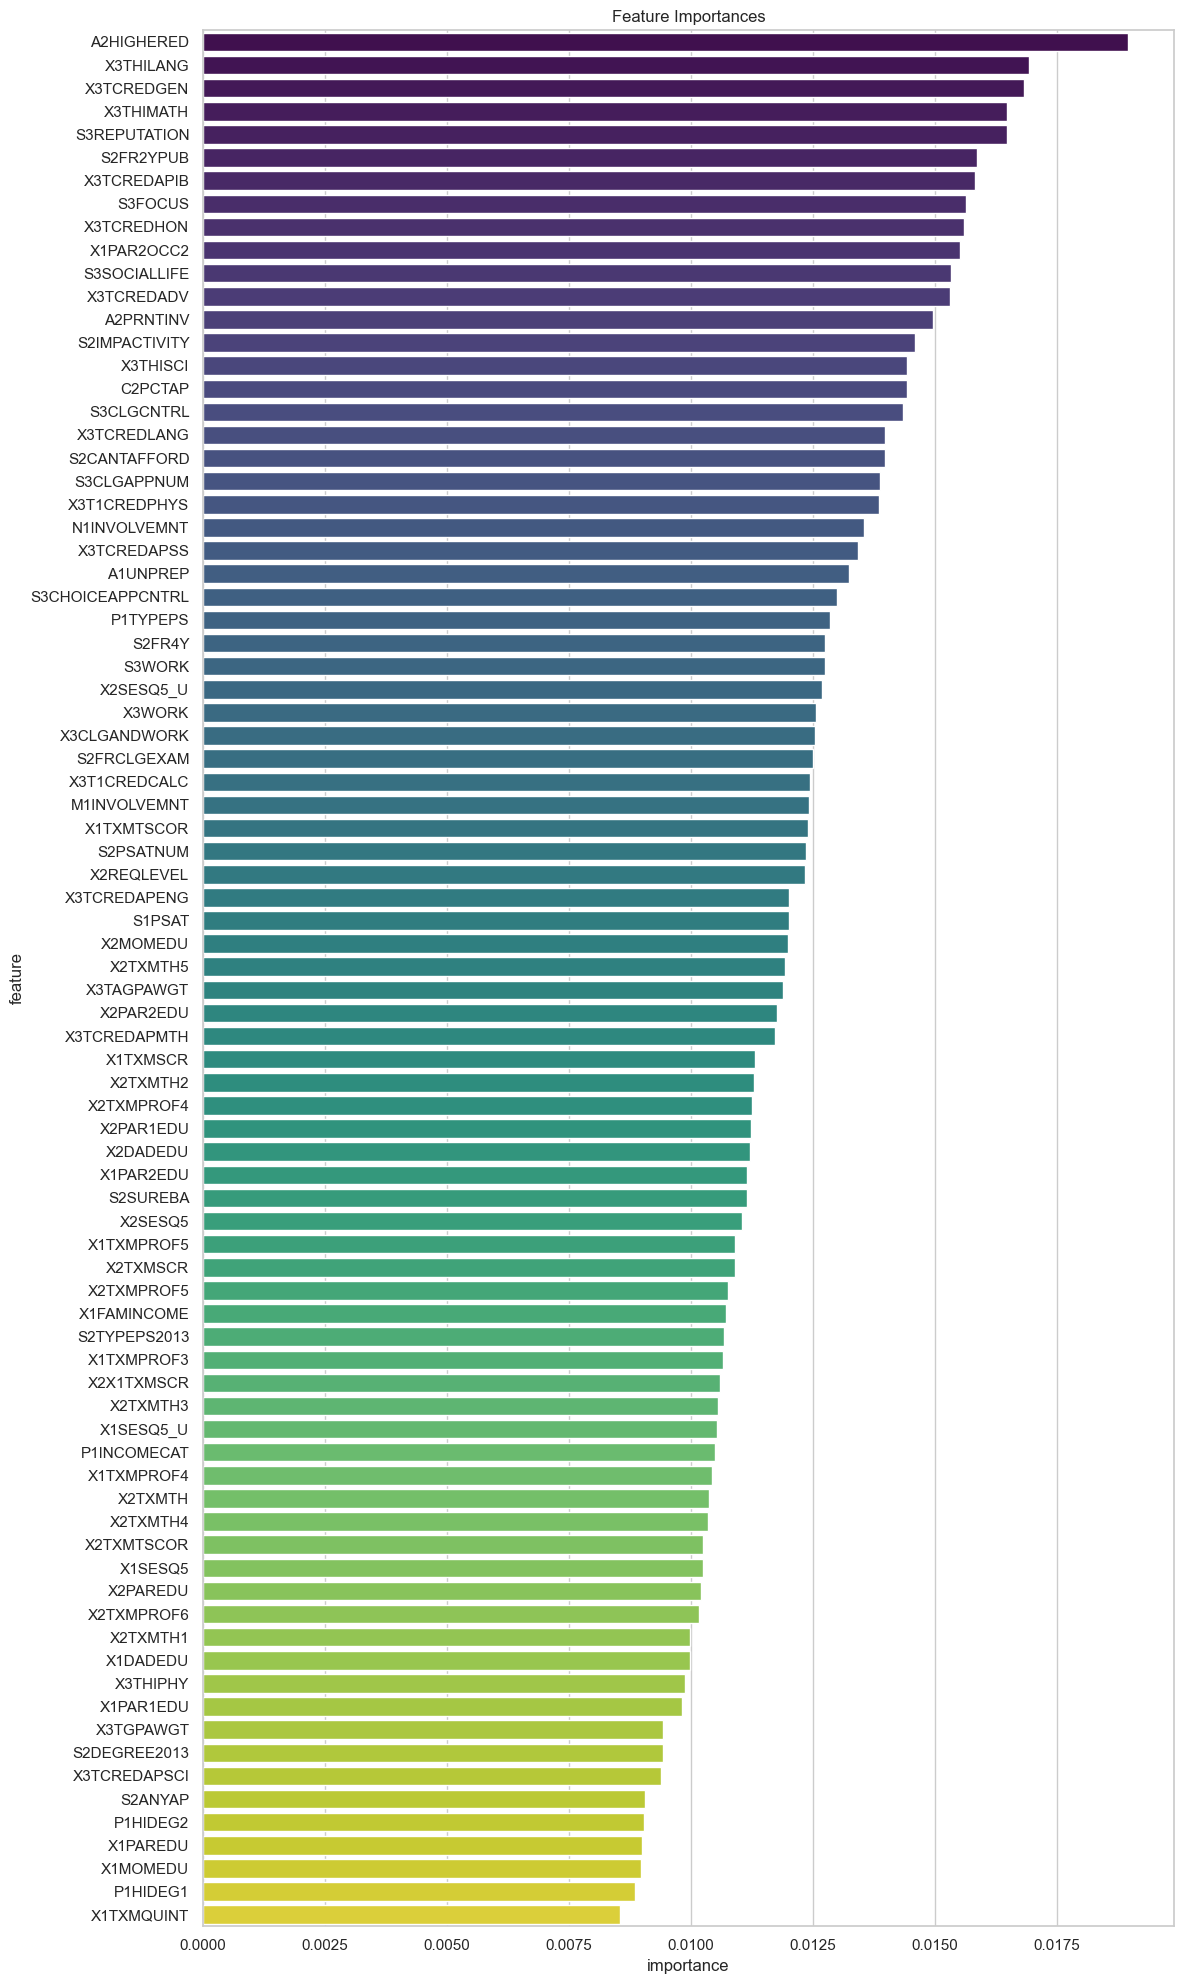

In [47]:
# Feature Importance - All Features

plt.figure(figsize=(12, 20))
sns.barplot(data=feature_importance_df, x='importance', y='feature', palette='viridis')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

### Correlation Matrix

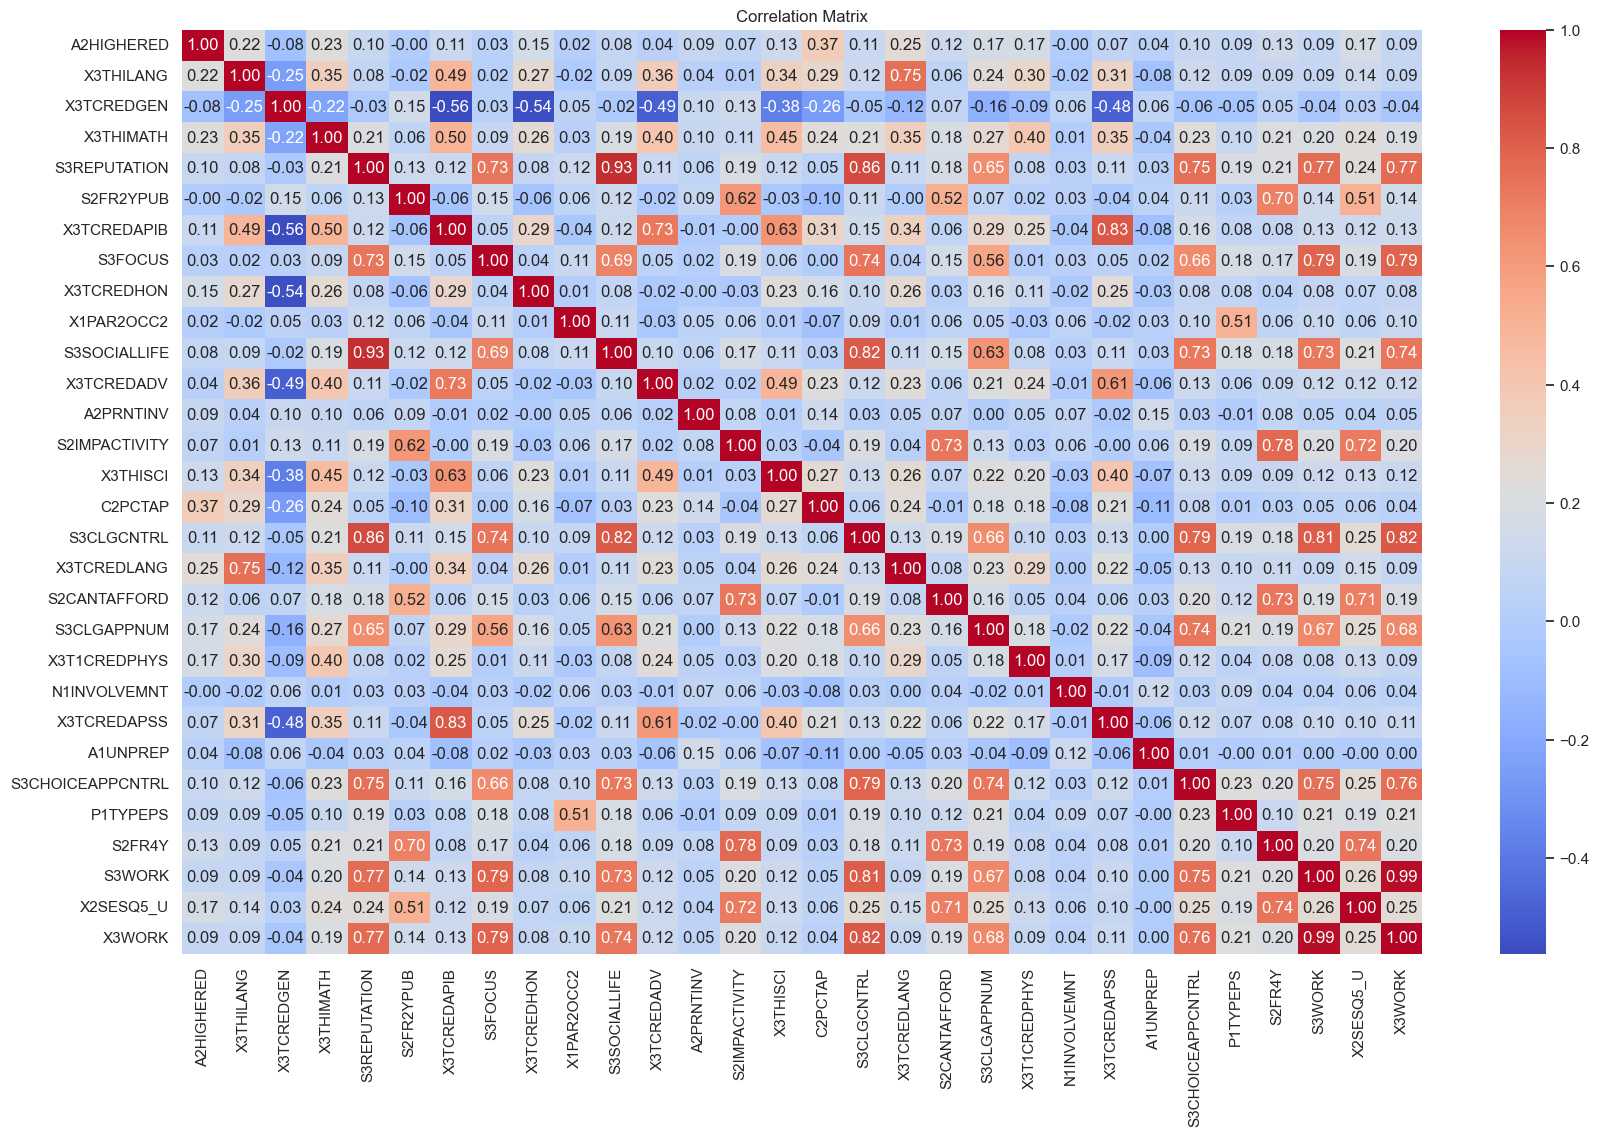

In [48]:
# Correlation Matrix

corr = X_selected.corr()  
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Model

## Model Iterations

In [49]:
# Algorithms - Hyperparameters Iterations 

models = {
    # LOGISTIC REGRESSION
    'LogReg_Default': {
        'model': LogisticRegression(max_iter=500, random_state=42),
        'group': 'Logistic Regression'
    },
    'LogReg_Balanced': {
        'model': LogisticRegression(max_iter=500, class_weight='balanced', random_state=42),
        'group': 'Logistic Regression'
    },
    'LogReg_L1': {
        'model': LogisticRegression(max_iter=500, penalty='l1', solver='saga', random_state=42),
        'group': 'Logistic Regression'
    },
    
    # DECISION TREE
    'DT_Default': {
        'model': DecisionTreeClassifier(random_state=42),
        'group': 'Decision Tree'
    },
    'DT_Depth5': {
        'model': DecisionTreeClassifier(max_depth=5, random_state=42),
        'group': 'Decision Tree'
    },
    'DT_Depth5_MinSamplesLeaf5': {
        'model': DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42),
        'group': 'Decision Tree'
    },
    
    # RANDOM FOREST
    'RF_Default': {
        'model': RandomForestClassifier(random_state=42),
        'group': 'Random Forest'
    },
    'RF_300Trees': {
        'model': RandomForestClassifier(n_estimators=300, random_state=42),
        'group': 'Random Forest'
    },
    'RF_Depth5': {
        'model': RandomForestClassifier(max_depth=5, random_state=42),
        'group': 'Random Forest'
    },
    'RF_Depth3': {
        'model': RandomForestClassifier(n_estimators=300,max_depth=3, random_state=42),
        'group': 'Random Forest'
    },


    # EXTRA TREES
    'ET_Default': {
        'model': ExtraTreesClassifier(random_state=42),
        'group': 'Extra Trees'
    },
    'ET_300Trees': {
        'model': ExtraTreesClassifier(n_estimators=300, random_state=42),
        'group': 'Extra Trees'
    },

    # GRADIENT BOOSTING
    'GB_Default': {
        'model': GradientBoostingClassifier(random_state=42),
        'group': 'Gradient Boosting'
    },
    'GB_LR0.05': {
        'model': GradientBoostingClassifier(learning_rate=0.05, n_estimators=200, random_state=42),
        'group': 'Gradient Boosting'
    },

    # ADABOOST
    'Ada_Default': {
        'model': AdaBoostClassifier(random_state=42),
        'group': 'AdaBoost'
    },
    'Ada_LR0.5': {
        'model': AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42),
        'group': 'AdaBoost'
    },
    
    # XGBOOST
    'XGB_Default': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'group': 'XGBoost'
    },
    'XGB_LR0.05': {
        'model': XGBClassifier(
            use_label_encoder=False, eval_metric='logloss',
            learning_rate=0.05, n_estimators=200, random_state=42
        ),
        'group': 'XGBoost'
    },
    
    # LIGHTGBM
    'LGBM_Default': {
        'model': LGBMClassifier(random_state=42, verbose=-1),
        'group': 'LightGBM'
    },
    'LGBM_MoreLeaves': {
        'model': LGBMClassifier(num_leaves=63, random_state=42, verbose=-1),
        'group': 'LightGBM'
    },
    
    # SVM
    'SVM_Default': {
        'model': SVC(kernel='rbf', probability=True, random_state=42),
        'group': 'SVM'
    },
    'SVM_C10_Gamma0.01': {
        'model': SVC(kernel='rbf', C=10, gamma=0.01, probability=True, random_state=42),
        'group': 'SVM'
    },
    
    # NEURAL NETWORK (MLP)
    'MLP_Default': {
        'model': MLPClassifier(max_iter=500, random_state=42),
        'group': 'Neural Network (MLP)'
    },
    'MLP_2Layer': {
        'model': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
        'group': 'Neural Network (MLP)'
    }
}



In [50]:
# Number of Features Iterations

top_n_values = range(5, 16, 5)  # e.g., 5, 10, 15, 20, 25

In [51]:
# Probability Threshold Iterations

thresholds = [round(x, 2) for x in np.arange(0.05, 0.51, 0.05)]

## Model Training & Evaluation 

In [52]:
# Iterate over models, top_n features and probability thresholds

performance_records = []

for top_n in top_n_values:
    # Select the top n features by importance
    selected_features = feature_importance_df.head(top_n)['feature'].values
    X_selected_n = X[selected_features]

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_selected_n, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )
    
    for model_key, model_info in models.items():
        group_name = model_info['group']
        estimator = model_info['model']
        
        estimator.fit(X_train, y_train)
        
        # If model supports probabilities
        if hasattr(estimator, "predict_proba"):
            y_proba = estimator.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, y_proba)
            
            for th in thresholds:
                y_pred_th = (y_proba >= th).astype(int)
                
                # Compute confusion-matrix-based metrics
                accuracy = accuracy_score(y_test, y_pred_th)
                precision = precision_score(y_test, y_pred_th, zero_division=0)
                recall = recall_score(y_test, y_pred_th, zero_division=0)
                f2 = fbeta_score(y_test, y_pred_th, beta=2, zero_division=0)
                
                tn, fp, fn, tp = confusion_matrix(y_test, y_pred_th).ravel()

                specificity = tn / (tn + fp) if (tn + fp) else np.nan
                npv = tn / (tn + fn) if (tn + fn) else np.nan
                pct_pred_positive = (y_pred_th.sum() / len(y_pred_th)) * 100

                performance_records.append({
                    'Group': group_name,
                    'Model': model_key,
                    'Top_N': top_n,
                    'Threshold': th,
                    'F2-Score': f2,
                    'Recall': recall,
                    'Precision': precision,
                    'Specificity': specificity,
                    'NPV': npv,
                    'Accuracy': accuracy,       # <--- Added here (before AUC)
                    'AUC': auc,
                    'Pct_Pred_Positive': pct_pred_positive
                })
        else:
            # If no predict_proba
            performance_records.append({
                'Group': group_name,
                'Model': model_key,
                'Top_N': top_n,
                'Threshold': np.nan,
                'F2-Score': np.nan,
                'Recall': np.nan,
                'Precision': np.nan,
                'Specificity': np.nan,
                'NPV': np.nan,
                'Accuracy': np.nan,
                'AUC': np.nan,
                'Pct_Pred_Positive': np.nan
            })

# Convert to DataFrame
results_df = pd.DataFrame(performance_records)

# Reorder columns: now Accuracy appears before AUC
col_order = [
    'Group', 'Model', 'Top_N', 'Threshold',
    'F2-Score', 'Recall', 'Precision', 'Specificity', 'NPV',
    'Accuracy', 'AUC', 'Pct_Pred_Positive'
]


/Users/andrerincon/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/andrerincon/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [11:00:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andrerincon/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [11:00:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andrerincon/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/andrerincon/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning:

## All Models Performance Results

In [53]:
# Convert to DataFrame
results_df = pd.DataFrame(performance_records)

# Sort by F2-Score 
results_df_sorted = results_df.sort_values(by='F2-Score', ascending=False)

# Reorder columns
col_order = [
    'Group',
    'Model',
    'Top_N',
    'Threshold',
    'F2-Score',
    'Recall',
    'Precision',
    'Specificity',
    'NPV',
    'Accuracy',
    'AUC',
    'Pct_Pred_Positive'
]
results_df_sorted = results_df_sorted[col_order]

# Round numeric columns
for metric in ["F2-Score", "Recall", "Precision","Specificity", "Accuracy","NPV", "AUC","Pct_Pred_Positive"]:
    results_df_sorted[metric] = results_df_sorted[metric].round(4)

display(results_df_sorted)

,Group,Model,Top_N,Threshold,F2-Score,Recall,Precision,Specificity,NPV,Accuracy,AUC,Pct_Pred_Positive
561,Random Forest,RF_Depth5,15,0.10,0.5866,0.9155,0.2407,0.3935,0.9568,0.4841,0.7139,66.0147
331,Random Forest,RF_Depth3,10,0.10,0.5862,0.9577,0.2297,0.3254,0.9735,0.4352,0.7033,72.3716
591,Extra Trees,ET_300Trees,15,0.10,0.5816,0.8732,0.2490,0.4467,0.9438,0.5208,0.7197,60.8802
551,Random Forest,RF_300Trees,15,0.10,0.5812,0.8873,0.2442,0.4231,0.9470,0.5037,0.7049,63.0807
592,Extra Trees,ET_300Trees,15,0.15,0.5797,0.7887,0.2814,0.5769,0.9286,0.6137,0.7197,48.6553
...,...,...,...,...,...,...,...,...,...,...,...,...
579,Random Forest,RF_Depth3,15,0.50,0.0000,0.0000,0.0000,1.0000,0.8264,0.8264,0.7015,0.0000
209,SVM,SVM_Default,5,0.50,0.0000,0.0000,0.0000,1.0000,0.8264,0.8264,0.5753,0.0000
99,Random Forest,RF_Depth3,5,0.50,0.0000,0.0000,0.0000,1.0000,0.8264,0.8264,0.7084,0.0000
229,Neural Network (MLP),MLP_Default,5,0.50,0.0000,0.0000,0.0000,0.9852,0.8243,0.8142,0.6469,1.2225


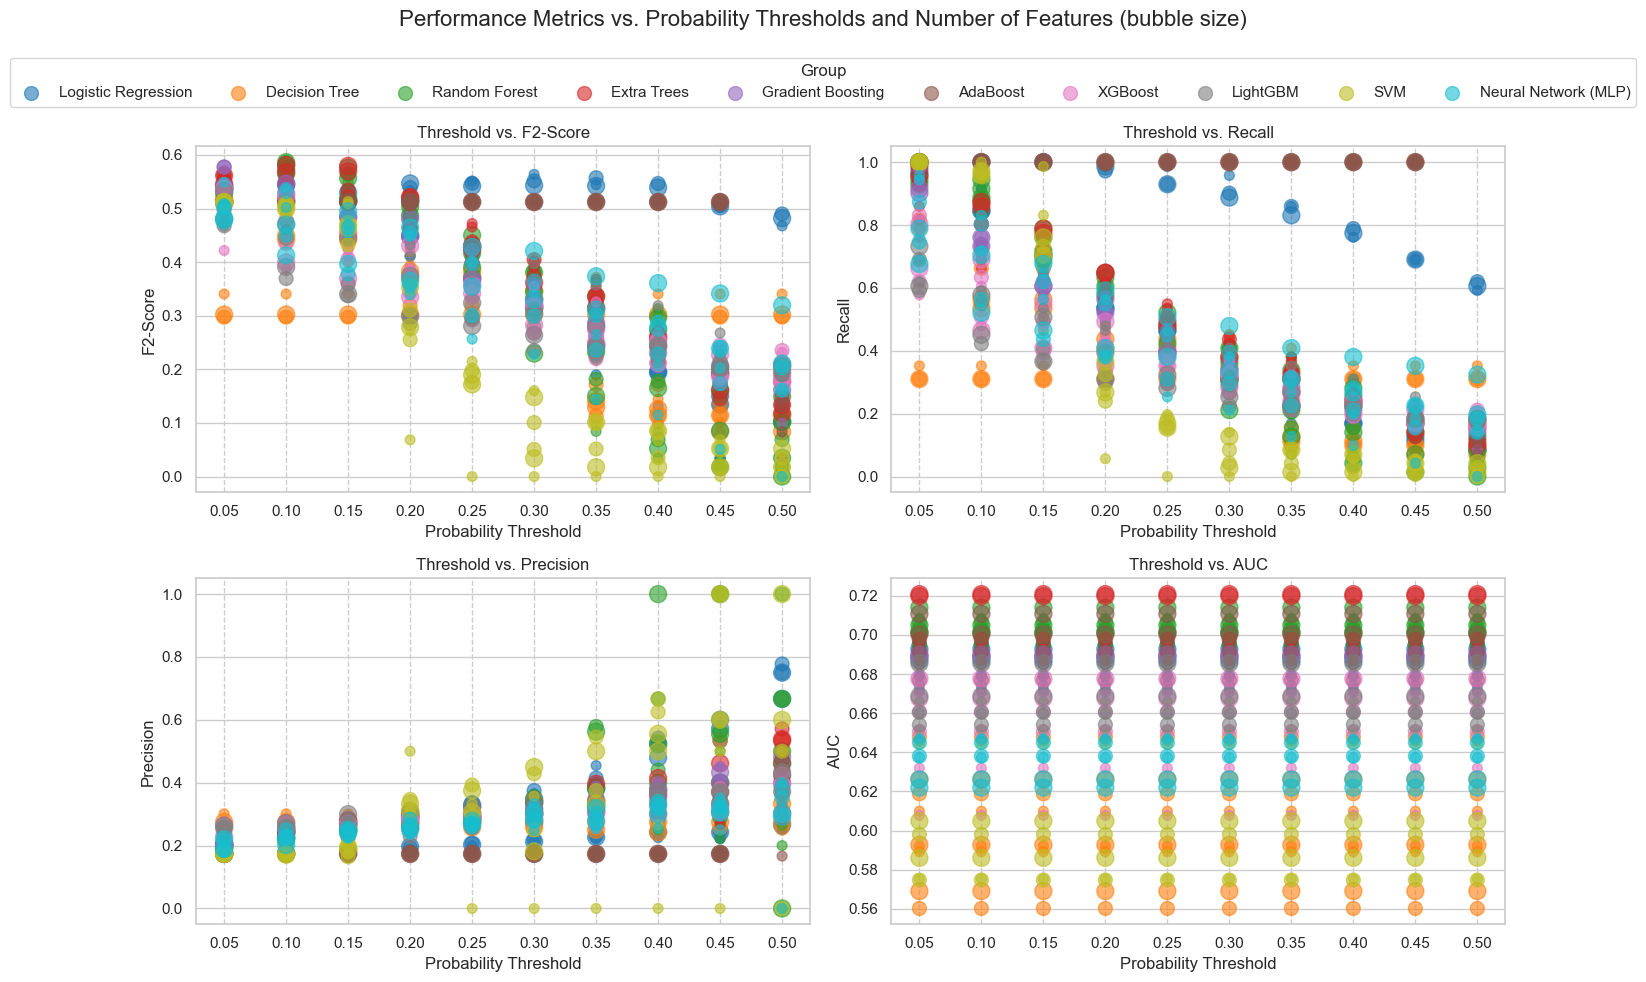

In [54]:
# Performance Charts

# Define x-ticks for thresholds
xticks = np.arange(0.05, 0.51, 0.05)

# Get the unique groups 
unique_groups = results_df['Group'].unique()
group_to_idx = {group: idx for idx, group in enumerate(unique_groups)}
cmap = plt.cm.get_cmap("tab10", len(unique_groups))

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()  # flatten for easy indexing

# Plot 1: F2-Score vs. Threshold
for group in unique_groups:
    df_temp = results_df[results_df['Group'] == group]
    axs[0].scatter(
        x=df_temp['Threshold'],
        y=df_temp['F2-Score'],
        s=df_temp['Top_N'] * 10,  # bubble size by Top_N
        color=cmap(group_to_idx[group]),
        alpha=0.6,
        label=group
    )
axs[0].set_xlabel('Probability Threshold')
axs[0].set_ylabel('F2-Score')
axs[0].set_title('Threshold vs. F2-Score')
axs[0].set_xticks(xticks)
axs[0].grid(axis='x', linestyle='--')

# Plot 2: Recall vs. Threshold
for group in unique_groups:
    df_temp = results_df[results_df['Group'] == group]
    axs[1].scatter(
        x=df_temp['Threshold'],
        y=df_temp['Recall'],
        s=df_temp['Top_N'] * 10,
        color=cmap(group_to_idx[group]),
        alpha=0.6,
        label=group
    )
axs[1].set_xlabel('Probability Threshold')
axs[1].set_ylabel('Recall')
axs[1].set_title('Threshold vs. Recall')
axs[1].set_xticks(xticks)
axs[1].grid(axis='x', linestyle='--')

# Plot 3: Precision vs. Threshold
for group in unique_groups:
    df_temp = results_df[results_df['Group'] == group]
    axs[2].scatter(
        x=df_temp['Threshold'],
        y=df_temp['Precision'],
        s=df_temp['Top_N'] * 10,
        color=cmap(group_to_idx[group]),
        alpha=0.6,
        label=group
    )
axs[2].set_xlabel('Probability Threshold')
axs[2].set_ylabel('Precision')
axs[2].set_title('Threshold vs. Precision')
axs[2].set_xticks(xticks)
axs[2].grid(axis='x', linestyle='--')

# Plot 4: AUC vs. Threshold
for group in unique_groups:
    df_temp = results_df[results_df['Group'] == group]
    axs[3].scatter(
        x=df_temp['Threshold'],
        y=df_temp['AUC'],
        s=df_temp['Top_N'] * 10,
        color=cmap(group_to_idx[group]),
        alpha=0.6,
        label=group
    )
axs[3].set_xlabel('Probability Threshold')
axs[3].set_ylabel('AUC')
axs[3].set_title('Threshold vs. AUC')
axs[3].set_xticks(xticks)
axs[3].grid(axis='x', linestyle='--')

# Title
fig.suptitle("Performance Metrics vs. Probability Thresholds and Number of Features (bubble size)", fontsize=16, y=0.98)

# Legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Group', loc='upper center', bbox_to_anchor=(0.5, 0.94), ncol=len(unique_groups))

# Spacing
plt.tight_layout(rect=[0, 0, 1, 0.92])

plt.show()

## Best Models Performance Results

In [ ]:
# filter for the best models

best_models = results_df_sorted[
    (results_df_sorted['F2-Score'] >= 0.5) &
    (results_df_sorted['Recall'] >= 0.8) &
    (results_df_sorted['Precision'] >= 0.2) &
    (results_df_sorted['AUC'] >= 0.68)
]
display(best_models)


,Group,Model,Top_N,Threshold,F2-Score,Recall,Precision,Specificity,NPV,Accuracy,AUC,Pct_Pred_Positive
561,Random Forest,RF_Depth5,15,0.10,0.5866,0.9155,0.2407,0.3935,0.9568,0.4841,0.7139,66.0147
331,Random Forest,RF_Depth3,10,0.10,0.5862,0.9577,0.2297,0.3254,0.9735,0.4352,0.7033,72.3716
591,Extra Trees,ET_300Trees,15,0.10,0.5816,0.8732,0.2490,0.4467,0.9438,0.5208,0.7197,60.8802
551,Random Forest,RF_300Trees,15,0.10,0.5812,0.8873,0.2442,0.4231,0.9470,0.5037,0.7049,63.0807
81,Random Forest,RF_Depth5,5,0.10,0.5794,0.8732,0.2470,0.4408,0.9430,0.5159,0.6998,61.3692
301,Random Forest,RF_Default,10,0.10,0.5794,0.8732,0.2470,0.4408,0.9430,0.5159,0.6951,61.3692
91,Random Forest,RF_Depth3,5,0.10,0.5776,0.9437,0.2264,0.3225,0.9646,0.4303,0.7084,72.3716
370,Gradient Boosting,GB_LR0.05,10,0.05,0.5776,0.9859,0.2174,0.2544,0.9885,0.3814,0.6910,78.7286
360,Gradient Boosting,GB_Default,10,0.05,0.5776,0.9859,0.2174,0.2544,0.9885,0.3814,0.6904,78.7286
321,Random Forest,RF_Depth5,10,0.10,0.5769,0.8873,0.2405,0.4112,0.9456,0.4939,0.7065,64.0587


Number of models meeting the criteria: 11


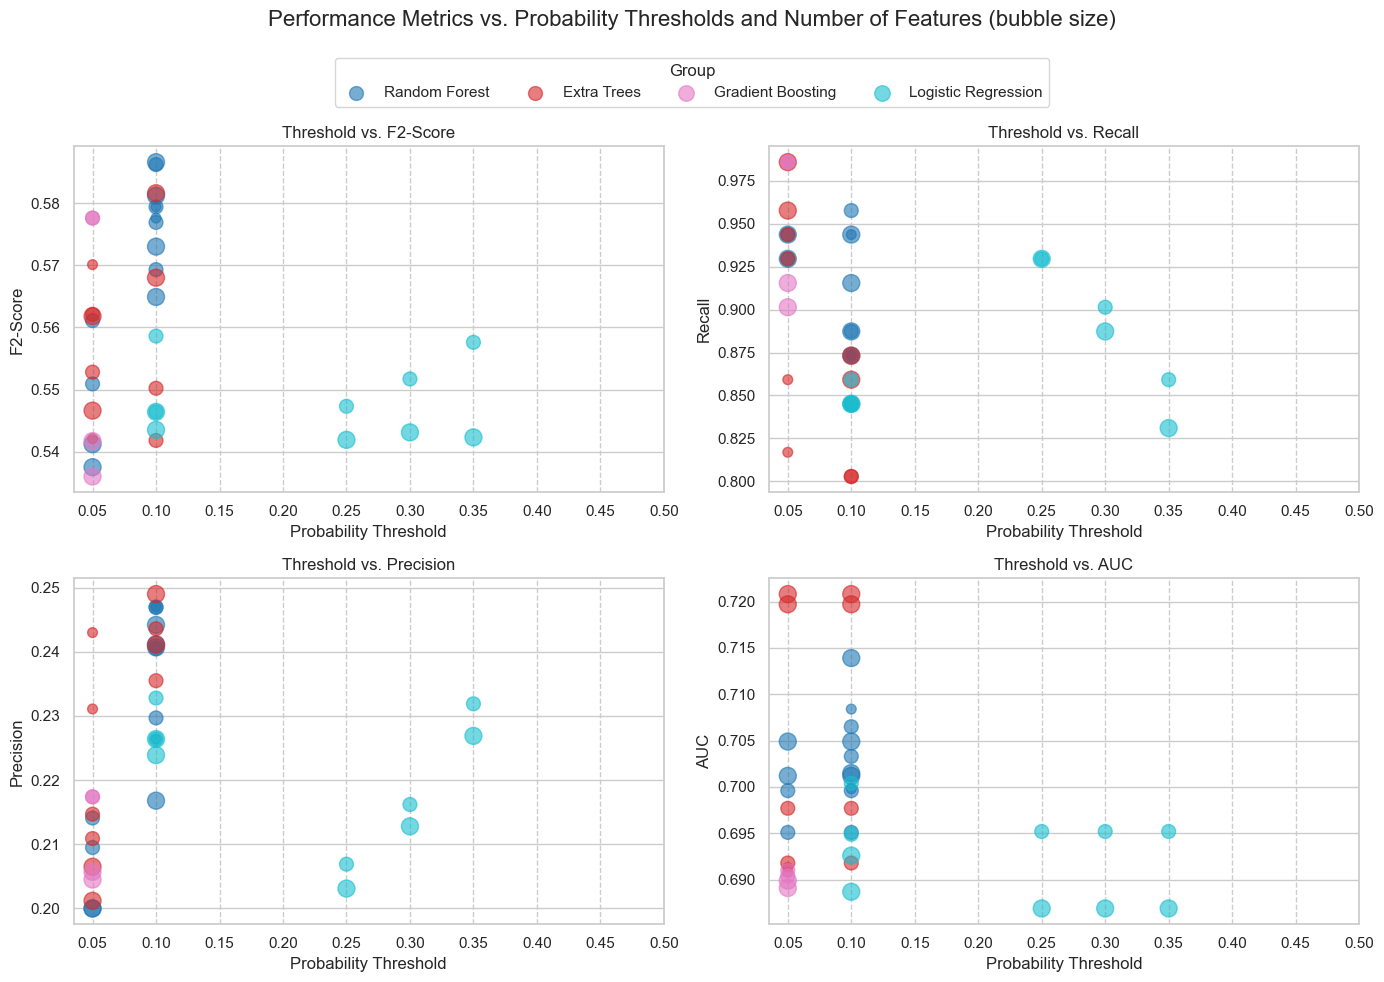

In [56]:
# Performance Charts

# Define x-ticks for thresholds
xticks = np.arange(0.05, 0.51, 0.05)

# Get the unique groups 
unique_groups = best_models['Group'].unique()
group_to_idx = {group: idx for idx, group in enumerate(unique_groups)}
cmap = plt.cm.get_cmap("tab10", len(unique_groups))

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()  # flatten for easy indexing

# Plot 1: F2-Score vs. Threshold
for group in unique_groups:
    df_temp = best_models[best_models['Group'] == group]
    axs[0].scatter(
        x=df_temp['Threshold'],
        y=df_temp['F2-Score'],
        s=df_temp['Top_N'] * 10,  # bubble size by Top_N
        color=cmap(group_to_idx[group]),
        alpha=0.6,
        label=group
    )
axs[0].set_xlabel('Probability Threshold')
axs[0].set_ylabel('F2-Score')
axs[0].set_title('Threshold vs. F2-Score')
axs[0].set_xticks(xticks)
axs[0].grid(axis='x', linestyle='--')

# Plot 2: Recall vs. Threshold
for group in unique_groups:
    df_temp = best_models[best_models['Group'] == group]
    axs[1].scatter(
        x=df_temp['Threshold'],
        y=df_temp['Recall'],
        s=df_temp['Top_N'] * 10,
        color=cmap(group_to_idx[group]),
        alpha=0.6,
        label=group
    )
axs[1].set_xlabel('Probability Threshold')
axs[1].set_ylabel('Recall')
axs[1].set_title('Threshold vs. Recall')
axs[1].set_xticks(xticks)
axs[1].grid(axis='x', linestyle='--')

# Plot 3: Precision vs. Threshold
for group in unique_groups:
    df_temp = best_models[best_models['Group'] == group]
    axs[2].scatter(
        x=df_temp['Threshold'],
        y=df_temp['Precision'],
        s=df_temp['Top_N'] * 10,
        color=cmap(group_to_idx[group]),
        alpha=0.6,
        label=group
    )
axs[2].set_xlabel('Probability Threshold')
axs[2].set_ylabel('Precision')
axs[2].set_title('Threshold vs. Precision')
axs[2].set_xticks(xticks)
axs[2].grid(axis='x', linestyle='--')

# Plot 4: AUC vs. Threshold
for group in unique_groups:
    df_temp = best_models[best_models['Group'] == group]
    axs[3].scatter(
        x=df_temp['Threshold'],
        y=df_temp['AUC'],
        s=df_temp['Top_N'] * 10,
        color=cmap(group_to_idx[group]),
        alpha=0.6,
        label=group
    )
axs[3].set_xlabel('Probability Threshold')
axs[3].set_ylabel('AUC')
axs[3].set_title('Threshold vs. AUC')
axs[3].set_xticks(xticks)
axs[3].grid(axis='x', linestyle='--')

# Title
fig.suptitle("Performance Metrics vs. Probability Thresholds and Number of Features (bubble size)", fontsize=16, y=0.98)

# Legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Group', loc='upper center', bbox_to_anchor=(0.5, 0.94), ncol=len(unique_groups))

# Spacing
plt.tight_layout(rect=[0, 0, 1, 0.92])

plt.show()

## Model Insights

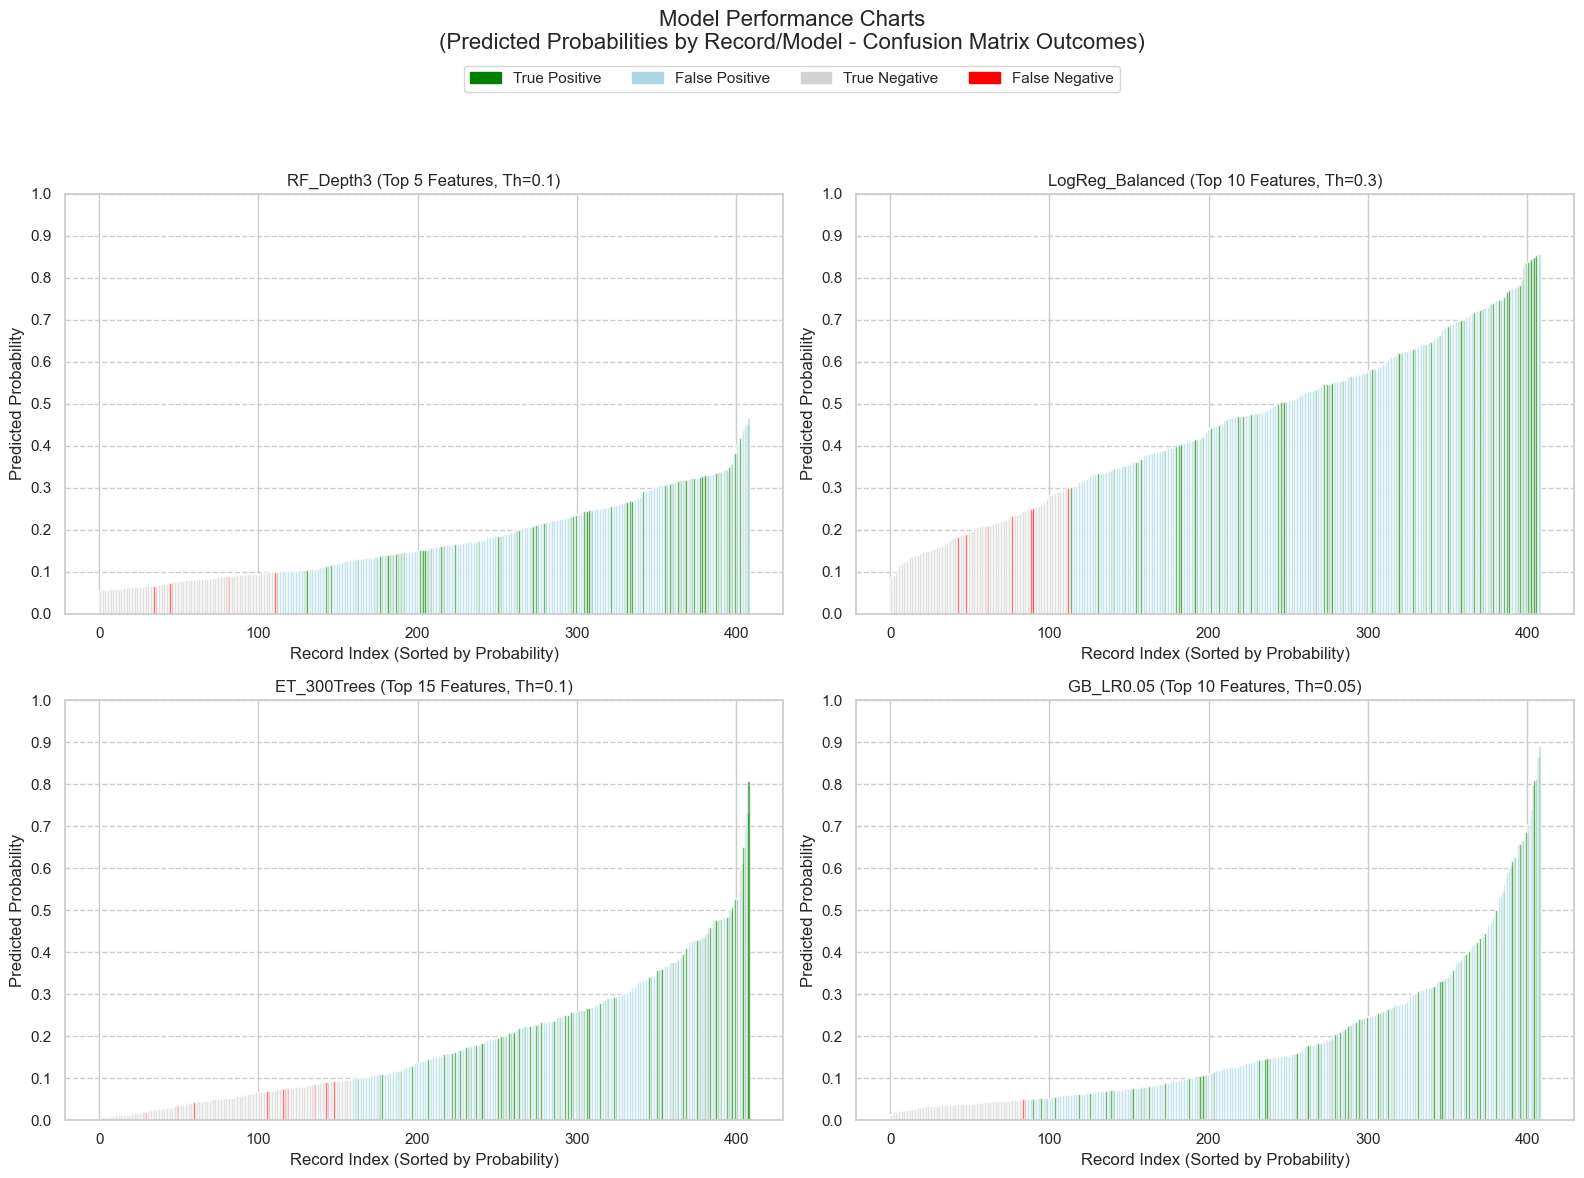

In [57]:
# Confusion Matrix Colors
def assign_color(row):
    pred = row['Predicted_Label']
    actual = row['Actual_Label']
    if pred == 1 and actual == 1:
        return 'green'   # True Positive
    elif pred == 1 and actual == 0:
        return 'lightblue'    # False Positive
    elif pred == 0 and actual == 0:
        return 'lightgray'    # True Negative
    else:
        return 'red'     # False Negative

# Results
def get_results_df(model_key, top_n, threshold):
    # Select the top_n features based on feature importance
    selected_features = feature_importance_df.head(top_n)['feature'].values
    X_selected = X[selected_features]
    
    # (Re)split data using local split for each configuration
    X_train, X_test, y_train, y_test = train_test_split(
        X_selected, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )
    
    # Model Info
    model_info = models[model_key]
    estimator = model_info['model']
    
    # Train the model
    estimator.fit(X_train, y_train)
    
    # Predict probabilities and apply threshold
    y_proba = estimator.predict_proba(X_test)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)
    
    # Results DataFrame
    df = pd.DataFrame({
        'Test_Index': X_test.index,
        'Probability': np.round(y_proba, 4),
        'Predicted_Label': y_pred,
        'Actual_Label': y_test
    })
    
    # Sort by predicted probability
    df = df.sort_values(by='Probability').reset_index(drop=True)
    
    # Assign colors based on confusion outcome
    df['Color'] = df.apply(assign_color, axis=1)
    
    return df

# Model Configurations
configs = [
    {"model_key": "RF_Depth3", "top_n": 5,  "threshold": 0.1,  "title": "RF_Depth3 (Top 5 Features, Th=0.1)"},
    {"model_key": "LogReg_Balanced", "top_n": 10, "threshold": 0.3,  "title": "LogReg_Balanced (Top 10 Features, Th=0.3)"},
    {"model_key": "ET_300Trees", "top_n": 15, "threshold": 0.1,  "title": "ET_300Trees (Top 15 Features, Th=0.1)"},
    {"model_key": "GB_LR0.05", "top_n": 10, "threshold": 0.05, "title": "GB_LR0.05 (Top 10 Features, Th=0.05)"}
]

# Grid
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()

# Plot each configuration's bar chart
for i, config in enumerate(configs):
    df = get_results_df(config["model_key"], config["top_n"], config["threshold"])
    
    axs[i].bar(x=df.index, height=df['Probability'], color=df['Color'], alpha=0.7, width=2)
    axs[i].set_title(config["title"])
    axs[i].set_xlabel('Record Index (Sorted by Probability)')
    axs[i].set_ylabel('Predicted Probability')
    axs[i].set_ylim(0, 1)
    # Set y-ticks at every 0.1 increment and add gridlines
    axs[i].set_yticks(np.arange(0, 1.1, 0.1))
    axs[i].grid(axis='y', linestyle='--')

# Legend
legend_handles = [
    mpatches.Patch(color='green', label='True Positive'),
    mpatches.Patch(color='lightblue', label='False Positive'),
    mpatches.Patch(color='lightgray', label='True Negative'),
    mpatches.Patch(color='red', label='False Negative')
]
fig.legend(handles=legend_handles, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 0.94))

# Title
fig.suptitle("Model Performance Charts\n(Predicted Probabilities by Record/Model - Confusion Matrix Outcomes)", fontsize=16, y=0.98)

plt.tight_layout(rect=[0, 0, 1, 0.91])
plt.show()